# Assignment 13
**Do a bivariate analysis on the penguins dataset for the following combination of columns; species VS sex, island VS sex:**

For this bivariate analysis, perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

---

#### Deel 1: Species vs Sex

**Assumptions:**
Ik denk niet dat er een sterke correlation is tussen species en sex, sex is waarschijnlijk redelijk gelijk verdeeld over de species.


In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

penguins = sns.load_dataset('penguins')
penguins_clean = penguins.dropna(subset=['species', 'sex'])


In [12]:
ct_species_sex = pd.crosstab(penguins_clean['species'], penguins_clean['sex'])
print(ct_species_sex)


sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


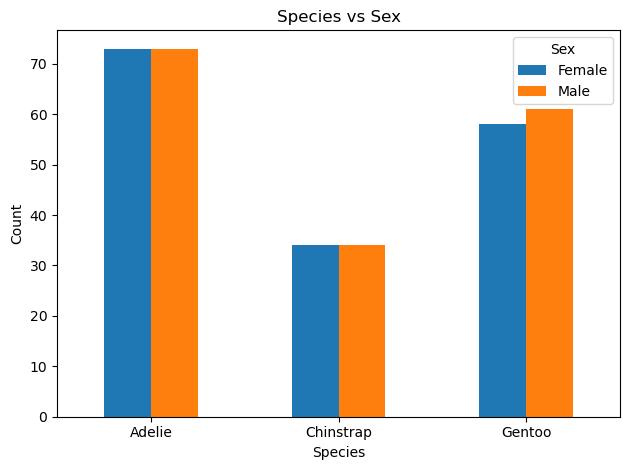

In [13]:
ct_species_sex.plot(kind='bar', stacked=False)
plt.title('Species vs Sex')
plt.ylabel('Count')
plt.xlabel('Species')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

**Findings:** Male en Female zijn goed in balans overal met een kleine uitzondering voor Gentoo waarbij male hoger scored maar niet veel.

In [14]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct_species_sex)
print(f"Chi2: {chi2:.3f}, p-value: {p:.4f}")


Chi2: 0.049, p-value: 0.9760


**Findings:** De p-waarde ligt boven 0,05. dit betekent dat er statistisch gezien geen association is tussen species en sex.

---

#### Deel 2: Island vs Sex

**Assumptions:** Misschien dat bepaalde eilanden meer hebben van een bepaalde species en species is misschien niet even verdeeld by sex.

In [15]:
ct_island_sex = pd.crosstab(penguins_clean['island'], penguins_clean['sex'])
print(ct_island_sex)

sex        Female  Male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23


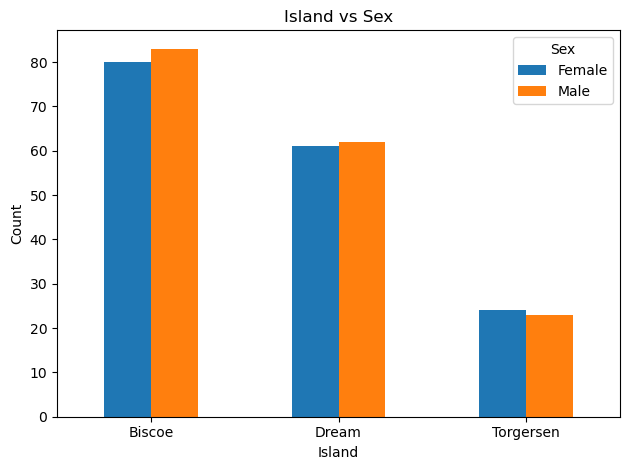

In [16]:
ct_island_sex.plot(kind='bar', stacked=False)
plt.title('Island vs Sex')
plt.ylabel('Count')
plt.xlabel('Island')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


**Findings:** Alweer is de count vrij gelijk verdeeld over de sexes op elk eiland, kleine verschillen maar niet groot.

In [17]:
chi2, p, dof, expected = chi2_contingency(ct_island_sex)
print(f"Chi2: {chi2:.3f}, p-value: {p:.4f}")


Chi2: 0.058, p-value: 0.9716


**Findings:** De p-waarde ligt boven 0,05. dit betekent dat er statistisch gezien geen association is tussen island en sex.